In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# mise en place

In [3]:

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
import numpy as np

profundidade = 7

R = 100
eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    arvore = DecisionTreeRegressor(max_depth = profundidade)
    arvore.fit(Xtreino, ytreino) 

    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O Erro Quadrático Médio de TREINO foi: 119.07
O Erro Quadrático Médio de TESTE  foi:  166.69


# Gráfico da Árvore com 1 Variável 

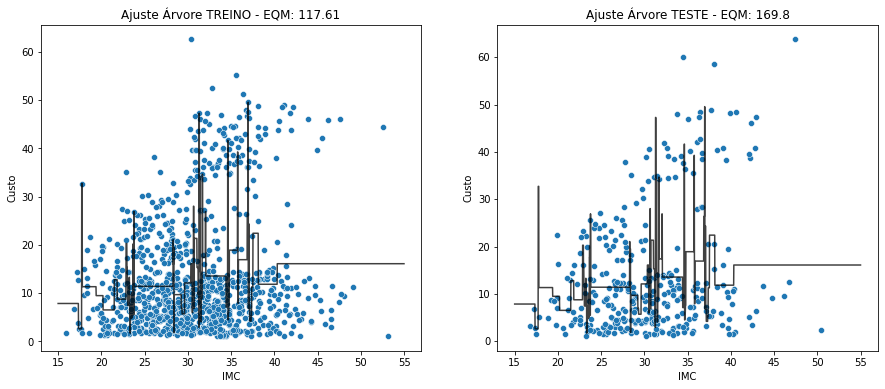

In [5]:


import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y = arvore.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

# Gráfico da Árvore com 2 Variáveis

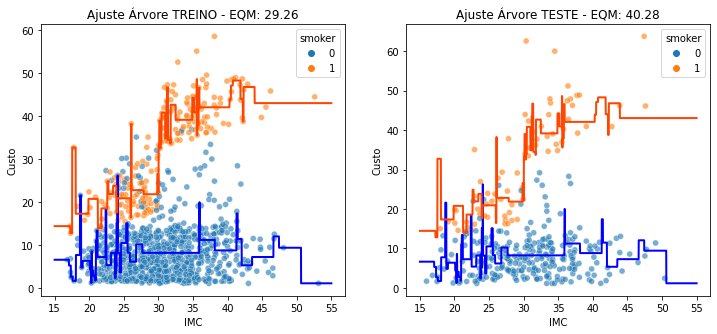

In [6]:

 
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

# Gráfico da Árvore

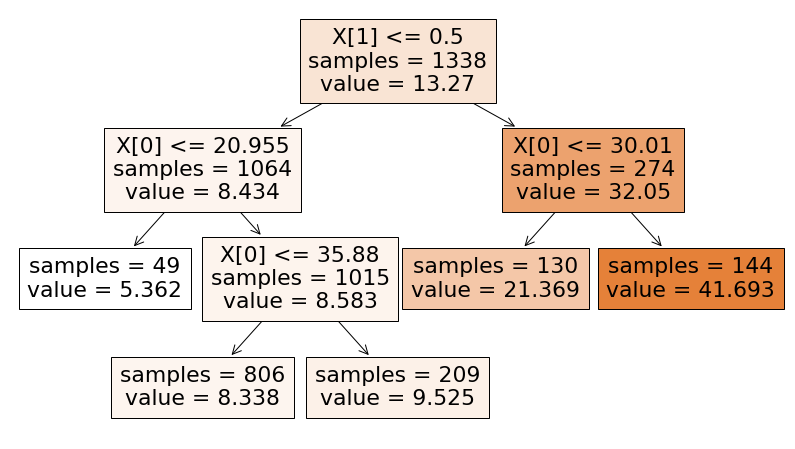

In [7]:


from sklearn.tree import plot_tree

X = dados[['bmi', 'smoker']]
y = dados['charges']

arvore = DecisionTreeRegressor(max_depth = 3, min_samples_split = 150)
arvore.fit(X, y)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = False, impurity = False)
plt.show()

#COMPARANDO MODELOS

In [8]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste 

In [9]:
from sklearn.neighbors import KNeighborsRegressor

HoldoutRepetido(modelo = KNeighborsRegressor())

EQM médio de TREINO: 31.22
EQM médio de TESTE: 48.18



(31.22, 48.18)

In [10]:
HoldoutRepetido(KNeighborsRegressor(n_neighbors = 20))

EQM médio de TREINO: 48.68
EQM médio de TESTE: 54.61



(48.68, 54.61)

In [11]:
HoldoutRepetido(DecisionTreeRegressor())

EQM médio de TREINO: 15.4
EQM médio de TESTE: 58.26



(15.4, 58.26)

In [12]:
from sklearn.linear_model import LinearRegression

X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 1),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 3),
           DecisionTreeRegressor(max_depth = 4),
           DecisionTreeRegressor(max_depth = 5)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 49.98
EQM médio de TESTE: 50.76

EQM médio de TREINO: 31.19
EQM médio de TESTE: 48.38

EQM médio de TREINO: 43.85
EQM médio de TESTE: 51.36

EQM médio de TREINO: 54.11
EQM médio de TESTE: 59.22

EQM médio de TREINO: 67.2
EQM médio de TESTE: 74.09

EQM médio de TREINO: 80.43
EQM médio de TESTE: 86.37

EQM médio de TREINO: 55.69
EQM médio de TESTE: 56.01

EQM médio de TREINO: 34.08
EQM médio de TESTE: 35.36

EQM médio de TREINO: 33.18
EQM médio de TESTE: 34.64

EQM médio de TREINO: 32.18
EQM médio de TESTE: 36.15

EQM médio de TREINO: 30.88
EQM médio de TESTE: 37.45



,EQM Treino,EQM Teste
Árvore - Prof = 3,33.18,34.64
Árvore - Prof = 2,34.08,35.36
Árvore - Prof = 4,32.18,36.15
Árvore - Prof = 5,30.88,37.45
KNN - K = 5,31.19,48.38
Regressão Linear,49.98,50.76
KNN - K = 15,43.85,51.36
Árvore - Prof = 1,55.69,56.01
KNN - K = 25,54.11,59.22
KNN - K = 35,67.20,74.09


# **Exercício Proposto**

# Investigue os parâmetros _max_depth_ e _min_samples_split_ para encontrar uma a configuração que apresenta os melhores resultados para o EQM. 

#max_depth int, default=Nenhum
A profundidade máxima da árvore. Se Nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos de min_samples_split amostras.

#min_samples_split int ou float, default=2
O número mínimo de amostras necessárias para dividir um nó interno:

* Se inteiro (int), então considere min_samples_splitcomo o número mínimo.

* Se ponto flutuante (float), então min_samples_splité uma fração e é o número mínimo de amostras para cada divisão.ceil(min_samples_split * n_samples)

In [14]:
from sklearn.tree import DecisionTreeRegressor

modelos = [DecisionTreeRegressor(max_depth = 1, min_samples_split = 2),
           DecisionTreeRegressor(max_depth = 2, min_samples_split = 2),
           DecisionTreeRegressor(max_depth = 3, min_samples_split = 2),
           DecisionTreeRegressor(max_depth = 4, min_samples_split = 2),
           DecisionTreeRegressor(max_depth = 5, min_samples_split = 2),
           DecisionTreeRegressor(max_depth = 6, min_samples_split = 2),
           DecisionTreeRegressor(max_depth = 1, min_samples_split = 3),
           DecisionTreeRegressor(max_depth = 2, min_samples_split = 3),
           DecisionTreeRegressor(max_depth = 3, min_samples_split = 3),
           DecisionTreeRegressor(max_depth = 4, min_samples_split = 3),
           DecisionTreeRegressor(max_depth = 5, min_samples_split = 3),
           DecisionTreeRegressor(max_depth = 6, min_samples_split = 3),
           DecisionTreeRegressor(max_depth = 1, min_samples_split = 4),
           DecisionTreeRegressor(max_depth = 2, min_samples_split = 4),
           DecisionTreeRegressor(max_depth = 3, min_samples_split = 4),
           DecisionTreeRegressor(max_depth = 4, min_samples_split = 4),
           DecisionTreeRegressor(max_depth = 5, min_samples_split = 4),
           DecisionTreeRegressor(max_depth = 6, min_samples_split = 4),
           DecisionTreeRegressor(max_depth = 1, min_samples_split = 5),
           DecisionTreeRegressor(max_depth = 2, min_samples_split = 5),
           DecisionTreeRegressor(max_depth = 3, min_samples_split = 5),
           DecisionTreeRegressor(max_depth = 4, min_samples_split = 5),
           DecisionTreeRegressor(max_depth = 5, min_samples_split = 5),
           DecisionTreeRegressor(max_depth = 6, min_samples_split = 5),]
nomes = ['Árvore - profundidade = 1 e min_samples_split = 2',
         'Árvore - profundidade = 2 e min_samples_split = 2',
         'Árvore - profundidade = 3 e min_samples_split = 2',
         'Árvore - profundidade = 4 e min_samples_split = 2',
         'Árvore - profundidade = 5 e min_samples_split = 2',
         'Árvore - profundidade = 6 e min_samples_split = 2',
         'Árvore - profundidade = 1 e min_samples_split = 3',
         'Árvore - profundidade = 2 e min_samples_split = 3',
         'Árvore - profundidade = 3 e min_samples_split = 3',
         'Árvore - profundidade = 4 e min_samples_split = 3',
         'Árvore - profundidade = 5 e min_samples_split = 3',
         'Árvore - profundidade = 6 e min_samples_split = 3',
         'Árvore - profundidade = 1 e min_samples_split = 4',
         'Árvore - profundidade = 2 e min_samples_split = 4',
         'Árvore - profundidade = 3 e min_samples_split = 4',
         'Árvore - profundidade = 4 e min_samples_split = 4',
         'Árvore - profundidade = 5 e min_samples_split = 4',
         'Árvore - profundidade = 6 e min_samples_split = 4',
         'Árvore - profundidade = 1 e min_samples_split = 5',
         'Árvore - profundidade = 2 e min_samples_split = 5',
         'Árvore - profundidade = 3 e min_samples_split = 5',
         'Árvore - profundidade = 4 e min_samples_split = 5',
         'Árvore - profundidade = 5 e min_samples_split = 5',
         'Árvore - profundidade = 6 e min_samples_split = 5',]

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 55.77
EQM médio de TESTE: 55.69

EQM médio de TREINO: 34.12
EQM médio de TESTE: 35.28

EQM médio de TREINO: 32.96
EQM médio de TESTE: 35.29

EQM médio de TREINO: 32.13
EQM médio de TESTE: 36.23

EQM médio de TREINO: 30.98
EQM médio de TESTE: 37.23

EQM médio de TREINO: 29.44
EQM médio de TESTE: 39.13

EQM médio de TREINO: 55.77
EQM médio de TESTE: 55.73

EQM médio de TREINO: 34.33
EQM médio de TESTE: 34.72

EQM médio de TREINO: 33.01
EQM médio de TESTE: 35.19

EQM médio de TREINO: 32.23
EQM médio de TESTE: 35.93

EQM médio de TREINO: 31.21
EQM médio de TESTE: 36.74

EQM médio de TREINO: 29.52
EQM médio de TESTE: 39.2

EQM médio de TREINO: 55.64
EQM médio de TESTE: 56.16

EQM médio de TREINO: 34.27
EQM médio de TESTE: 34.75

EQM médio de TREINO: 33.12
EQM médio de TESTE: 34.74

EQM médio de TREINO: 32.38
EQM médio de TESTE: 35.53

EQM médio de TREINO: 31.06
EQM médio de TESTE: 37.2

EQM médio de TREINO: 29.61
EQM médio de TESTE: 39.22

EQM médio de TREINO: 55.77
EQM

,EQM Treino,EQM Teste
Árvore - profundidade = 2 e min_samples_split = 3,34.33,34.72
Árvore - profundidade = 3 e min_samples_split = 4,33.12,34.74
Árvore - profundidade = 2 e min_samples_split = 4,34.27,34.75
Árvore - profundidade = 2 e min_samples_split = 5,34.27,34.86
Árvore - profundidade = 3 e min_samples_split = 3,33.01,35.19
Árvore - profundidade = 2 e min_samples_split = 2,34.12,35.28
Árvore - profundidade = 3 e min_samples_split = 2,32.96,35.29
Árvore - profundidade = 3 e min_samples_split = 5,32.90,35.53
Árvore - profundidade = 4 e min_samples_split = 4,32.38,35.53
Árvore - profundidade = 4 e min_samples_split = 5,32.39,35.62
